# Calculate 3d correlation function

In this example, we calculate the 3D correlation function for an example cosmology.

In [1]:
import numpy as np
#import pylab as plt
import pyccl as ccl
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

First, we define a set of cosmological parameters with two different power spectrum calculations.

In [2]:
#  nonlinear power spectrum with Boltzmann CLASS tranfer function
cosmo = ccl.Cosmology(Omega_c=0.25, Omega_b=0.05, h=0.7, sigma8=0.80, n_s=0.96,transfer_function='boltzmann_class', matter_power_spectrum='halofit')
#  linaer power spectrum with BBKS transfer funtion
cosmo_lin = ccl.Cosmology(Omega_c=0.25, Omega_b=0.05, h=0.7, sigma8=0.80, n_s=0.96, transfer_function='bbks', matter_power_spectrum='linear')

Create array for distances and calculate 3D correlation function for a = 1.

In [3]:
a = 1.0 # Scale factor
n_r = 10000 # number of points in r
r = np.logspace(-3., 4., n_r) # distance
xi = ccl.correlation_3d(cosmo, a, r)
xi_lin = ccl.correlation_3d(cosmo_lin, a, r)

Plot the 3d correlation function obtained for nonlinear power spectrum (blue line) and linear power spectrum (red line).
Plot the negative values as dashed lines.

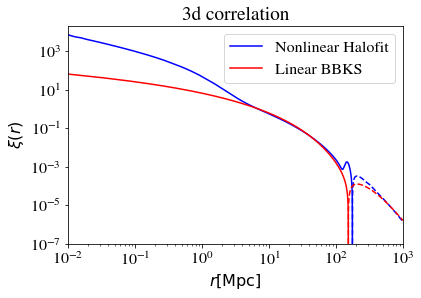

In [4]:
# Define array to hold only the values of xi(r) that are negative, so they can be plotted as a dashed line on log plot
# nonlinear
xin = [0.]*n_r # negative nonliear xi values
xin_lin = [0.]*n_r # negative linear xi values
for i in range (0,n_r-1):
    if xi[i] < 0:
        xin[i] = -xi[i]
    if xi_lin[i] < 0:
        xin_lin[i] = -xi_lin[i]    

# esthetic definitions for the plots
font = {'size'   : 16, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.mathtext.rcParams['legend.fontsize']='medium'
# array for storing legend
legarray = []

plt.plot(r, xi, 'b-')
legarray.append(r'Nonlinear Halofit')
plt.plot(r, xi_lin, 'r-')
legarray.append(r'Linear BBKS')
plt.plot(r, xin, 'b--')
plt.plot(r, xin_lin, 'r--')

plt.xscale('log')
plt.yscale('log')
plt.ylim((1.e-7,2.e4))
plt.xlim((0.01,1000))
plt.xlabel(r'$r [\mathrm{Mpc}]$')
plt.ylabel(r'$\xi (r)$')
plt.title('3d correlation') 
plt.ylabel(r'$\xi(r)$')
plt.legend(legarray)
plt.savefig('xi1.pdf',bbox_inches = 'tight')
plt.show()

Plot the 3d correlation function for large distances on linear scale.

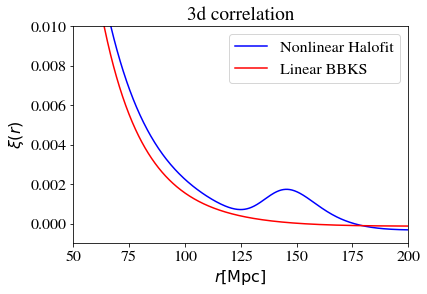

In [5]:
# now plot large r region on linear scale
plt.plot(r, xi, 'b-')
plt.plot(r, xi_lin, 'r-')

plt.ylim((-0.001,0.01))
plt.xlim((50,200))
plt.xlabel(r'$r$ (Mpc)')
plt.ylabel(r'$\xi (r)$')
plt.title('3d correlation') 
plt.xlabel(r'$r [\mathrm{Mpc}]$')
plt.ylabel(r'$\xi(r)$')
plt.legend(legarray)
plt.savefig('xi2.pdf',bbox_inches = 'tight')
plt.show()